# Building Autoencoders in Keras
* Source : https://blog.keras.io/building-autoencoders-in-keras.html



![-](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

## 자기 자신을 학습한다.
즉, 입력데이터와 레이블이 같다. 


아래에 결과가 있습니다. 위의 줄은 원래의 숫자이고 아랫 줄은 재구성된 숫자입니다. 지금 사용한 간단한 접근 방법으로 꽤 많은 비트 손실이 있었다는 것을 알 수 있습니다.



Adding a sparsity constraint on the encoded representations

이전 예제에서, 표현(representation)은 은닉층의 크기(32)에만 제약을 받았습니다. 이러한 상황에서, 전형적으로 발생하는 일은 은닉층이 PCA(principal component analysis)의 근사값을 학습한다는 것입니다. 표현을 더 간결하게 제한하는 다른 방법은 숨겨진 표현의 활동에 sparsity를 부여하는 것입니다. 이는 주어진 시간에 더 적은 유닛이 “실행”될 수 있도록 합니다. Keras에서는 activity_regularizer를 Dense layer에 추가하여 수행할 수 있습니다.

In [1]:
%matplotlib notebook
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers


In [2]:
# this is our input placeholder
x = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x1 = Dense(400, activation='relu')(x)
z = Dense(32, activation='relu')(x1)
# "decoded" is the lossy reconstruction of the input
y1 = Dense(256, activation='relu')(z)
y = Dense(784, activation='sigmoid')(y1)



# this model maps an input to its reconstruction
autoencoder = Model(x, y)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(x, z)


# create a placeholder for an encoded (32-dimensional) input
z = Input(shape=(32,))
# retrieve the last layer of the autoencoder model
y1 = autoencoder.layers[-2](z)
y  = autoencoder.layers[-1](y1)
# create the decoder model
decoder = Model(z, y)

In [4]:
opt=optimizers.RMSprop(lr=0.02, rho=0.9, epsilon=None, decay=0.0)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'],)

In [5]:
from tensorflow.python.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print( x_train.shape)
print( x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),verbose=2)

Epoch 1/50
235/235 - 9s - loss: 0.4003 - accuracy: 0.0109 - val_loss: 0.1710 - val_accuracy: 0.0097
Epoch 2/50
235/235 - 9s - loss: 0.1591 - accuracy: 0.0117 - val_loss: 0.1576 - val_accuracy: 0.0105
Epoch 3/50
235/235 - 9s - loss: 0.1521 - accuracy: 0.0126 - val_loss: 0.1531 - val_accuracy: 0.0152
Epoch 4/50
235/235 - 10s - loss: 0.1495 - accuracy: 0.0126 - val_loss: 0.1555 - val_accuracy: 0.0146
Epoch 5/50
235/235 - 10s - loss: 0.1479 - accuracy: 0.0126 - val_loss: 0.1523 - val_accuracy: 0.0109
Epoch 6/50
235/235 - 9s - loss: 0.1471 - accuracy: 0.0121 - val_loss: 0.1483 - val_accuracy: 0.0127
Epoch 7/50
235/235 - 10s - loss: 0.1465 - accuracy: 0.0123 - val_loss: 0.1486 - val_accuracy: 0.0133
Epoch 8/50
235/235 - 9s - loss: 0.1461 - accuracy: 0.0121 - val_loss: 0.1527 - val_accuracy: 0.0111
Epoch 9/50
235/235 - 9s - loss: 0.1456 - accuracy: 0.0128 - val_loss: 0.1523 - val_accuracy: 0.0134
Epoch 10/50
235/235 - 10s - loss: 0.1452 - accuracy: 0.0129 - val_loss: 0.1523 - val_accuracy: 0.

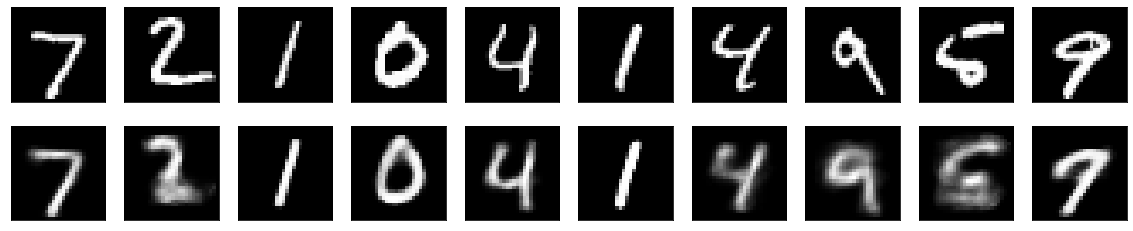

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 

# encode and decode some digits
# note that we take them from the *test* set
z = encoder.predict(x_test,  batch_size=10)
y = decoder.predict(z)


# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()